In [1]:
import pandas as pd
from hanziconv import HanziConv 
import unicodedata
import jieba
from stopwordsiso import stopwords
import emoji
from snownlp import SnowNLP

import numpy as np

from tensorflow.keras.initializers import Constant
from keras.models import Sequential
from keras.layers import Dense, Flatten, Embedding, ReLU, Dropout, Input, CuDNNLSTM, LSTM
from keras.models import Model
from keras.optimizers import RMSprop

import matplotlib.pyplot as plt

from keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from sklearn.model_selection import train_test_split


In [2]:
from gensim.models import Word2Vec
import gensim

In [3]:
df = pd.read_csv("../augmentation/augmented.csv", delimiter= ',')
X = df[["short_comment","score", "movie_name"]].copy()
Y = df[["Fake"]].copy()
X.head()

short_comment  score movie_name
0  没想到 ， 这是 唯一 一部 尊严 春节 档 的 电影 。      4   这个杀手不太冷静
1  没想到 ， 这是 电影 一部 尊重 春节 档 的 唯一 。      4   这个杀手不太冷静
2  没想到 ， 这是 唯一 一部 尊重 春节 档 的 电影 。      4   这个杀手不太冷静
3  没想到 ， 这是 唯一 一部 尊重 春节 档 的 电影 。      4   这个杀手不太冷静
4          能 能 给 负分 吗 卧槽 浪费 我 时间      1       独行月球

In [4]:
stopwords(["zh"])

{'、',
 '。',
 '〈',
 '〉',
 '《',
 '》',
 '一',
 '一个',
 '一些',
 '一何',
 '一切',
 '一则',
 '一方面',
 '一旦',
 '一来',
 '一样',
 '一种',
 '一般',
 '一转眼',
 '七',
 '万一',
 '三',
 '上',
 '上下',
 '下',
 '不',
 '不仅',
 '不但',
 '不光',
 '不单',
 '不只',
 '不外乎',
 '不如',
 '不妨',
 '不尽',
 '不尽然',
 '不得',
 '不怕',
 '不惟',
 '不成',
 '不拘',
 '不料',
 '不是',
 '不比',
 '不然',
 '不特',
 '不独',
 '不管',
 '不至于',
 '不若',
 '不论',
 '不过',
 '不问',
 '与',
 '与其',
 '与其说',
 '与否',
 '与此同时',
 '且',
 '且不说',
 '且说',
 '两者',
 '个',
 '个别',
 '中',
 '临',
 '为',
 '为了',
 '为什么',
 '为何',
 '为止',
 '为此',
 '为着',
 '乃',
 '乃至',
 '乃至于',
 '么',
 '之',
 '之一',
 '之所以',
 '之类',
 '乌乎',
 '乎',
 '乘',
 '九',
 '也',
 '也好',
 '也罢',
 '了',
 '二',
 '二来',
 '于',
 '于是',
 '于是乎',
 '云云',
 '云尔',
 '五',
 '些',
 '亦',
 '人',
 '人们',
 '人家',
 '什',
 '什么',
 '什么样',
 '今',
 '介于',
 '仍',
 '仍旧',
 '从',
 '从此',
 '从而',
 '他',
 '他人',
 '他们',
 '他们们',
 '以',
 '以上',
 '以为',
 '以便',
 '以免',
 '以及',
 '以故',
 '以期',
 '以来',
 '以至',
 '以至于',
 '以致',
 '们',
 '任',
 '任何',
 '任凭',
 '会',
 '似的',
 '但',
 '但凡',
 '但是',
 '何',
 '何以',
 '何况',
 '何处',
 '何时',
 '余外',
 '作为',
 '你',
 '你们',
 '使',


In [5]:
stopwords(["zh"])

stopwords_ZH = [HanziConv.toSimplified(i) for i in stopwords(["zh"])]
stopwords_ZH

['会',
 '甚么',
 '先不先',
 '把',
 '打',
 '啥',
 '小',
 '说来',
 '及至',
 '沿',
 '即令',
 '那么样',
 '总的来看',
 '人',
 '紧接着',
 '依照',
 '本',
 '倘若',
 '即若',
 '莫如',
 '赶',
 '随时',
 '旁人',
 '嘿',
 '哉',
 '喽',
 '或',
 '那么',
 '喂',
 '等到',
 '八',
 '什',
 '。',
 '漫说',
 '故此',
 '己',
 '而',
 '他',
 '以期',
 '哎',
 '咧',
 '为',
 '即如',
 '这里',
 '不比',
 '只当',
 '秒',
 '嗡',
 '才',
 '一切',
 '＠',
 '正是',
 '宁愿',
 '凭',
 '彼时',
 '零',
 '难道说',
 '五',
 '非但',
 '好',
 '当然',
 '若果',
 '不成',
 '替',
 '也罢',
 '设或',
 '出来',
 '呜唿',
 '此次',
 '怎奈',
 '又',
 '此间',
 '了',
 '分',
 '就',
 '若夫',
 '据',
 '诸',
 '％',
 '总的说来',
 '啪达',
 '云尔',
 '人家',
 '借',
 '再',
 '如何',
 '那时',
 '这个',
 '那会儿',
 '只要',
 '经',
 '呗',
 '自后',
 '哪怕',
 '一则',
 '还是',
 '且',
 '自各儿',
 '除',
 '抑或',
 '以',
 '此时',
 '果真',
 '月',
 '着呢',
 '加之',
 '由是',
 '给',
 '由',
 '开始',
 '＋',
 '就是了',
 '诸如',
 '年',
 '某个',
 '的确',
 '这么',
 '唿哧',
 '多',
 '只',
 '可以',
 '虽',
 '某些',
 '除此之外',
 '可',
 '得了',
 '孰料',
 '倘然',
 '开外',
 '非独',
 '！',
 '另悉',
 '不单',
 '不料',
 '是以',
 '这儿',
 '如上所述',
 '倘或',
 '哗',
 '这',
 '一般',
 '几',
 '拿',
 '其',
 '朝着',
 '＄',
 '又及',
 '呵',
 '呵',
 '如是',

In [6]:
# add voacb dict to jieba for tokenization
jieba.load_userdict("new_slang_dict.txt")
def tokenize(word):
    return list(jieba.cut(word))

stopwords_list = list(stopwords(["zh"]))
punc_list = '[\.\!︕\/_,$%^*(+\"\']+|[+——！，。？、~@#￥%……&*（）：；《）《》“”()»〔〕-]+-_-Ｄ '
def removal_sw(text_tokens):
    return [word for word in text_tokens if not word in stopwords_ZH and not word in punc_list]


Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\Kelvin\AppData\Local\Temp\jieba.cache
Loading model cost 0.316 seconds.
Prefix dict has been built successfully.


In [7]:
X["mention_of_movie_name"] = 0
for i in range(len(X)):
    X["mention_of_movie_name"].iloc[i] = str(X["short_comment"].iloc[i]).count(str(X["movie_name"]))
X

C:\Users\Kelvin\AppData\Local\Temp\ipykernel_11140\2297005332.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["mention_of_movie_name"].iloc[i] = str(X["short_comment"].iloc[i]).count(str(X["movie_name"]))


short_comment  score movie_name  \
0                         没想到 ， 这是 唯一 一部 尊严 春节 档 的 电影 。      4   这个杀手不太冷静   
1                         没想到 ， 这是 电影 一部 尊重 春节 档 的 唯一 。      4   这个杀手不太冷静   
2                         没想到 ， 这是 唯一 一部 尊重 春节 档 的 电影 。      4   这个杀手不太冷静   
3                         没想到 ， 这是 唯一 一部 尊重 春节 档 的 电影 。      4   这个杀手不太冷静   
4                                 能 能 给 负分 吗 卧槽 浪费 我 时间      1       独行月球   
...                                                 ...    ...        ...   
6395                             有点 好笑 ， 又 觉得 没啥 好看 的 。      3   这个杀手不太冷静   
6396  我 的 腾宝 ！ 就是 如果 一部 片子 个人 魅力 撑起 所有 ， 那 所有 的 分数 都...      3       独行月球   
6397  腾宝 的 我 ！ 如果 一部 片子 个人 魅力 撑起 所有 ， 那 所有 的 分数 都会 打...      3       独行月球   
6398  我 的 腾宝 ！ 如果 一部 片子 个人 魅力 撑起 所有 ， 那 所有 的 分数 都会 打...      3       独行月球   
6399  我 的 腾宝 ！ 如果 一部 片子 个人 魅力 撑起 所有 ， 那 所有 的 分数 都会 打...      3       独行月球   

      mention_of_movie_name  
0                         0  
1                         0  
2                         0  
3                         0  
4                         0  
...                     ...  
6395                      0  
6396                      0  
6397                      0  
6398                      0  
6399                      0  

[6400 rows x 4 columns]

In [8]:
X['short_comment'] = X['short_comment'].apply(HanziConv.toTraditional)
X

short_comment  score movie_name  \
0                         沒想到 ， 這是 唯一 一部 尊嚴 春節 檔 的 電影 。      4   这个杀手不太冷静   
1                         沒想到 ， 這是 電影 一部 尊重 春節 檔 的 唯一 。      4   这个杀手不太冷静   
2                         沒想到 ， 這是 唯一 一部 尊重 春節 檔 的 電影 。      4   这个杀手不太冷静   
3                         沒想到 ， 這是 唯一 一部 尊重 春節 檔 的 電影 。      4   这个杀手不太冷静   
4                                 能 能 給 負分 嗎 臥槽 浪費 我 時間      1       独行月球   
...                                                 ...    ...        ...   
6395                             有點 好笑 ， 又 覺得 沒啥 好看 的 。      3   这个杀手不太冷静   
6396  我 的 騰寶 ！ 就是 如果 一部 片子 個人 魅力 撐起 所有 ， 那 所有 的 分數 都...      3       独行月球   
6397  騰寶 的 我 ！ 如果 一部 片子 個人 魅力 撐起 所有 ， 那 所有 的 分數 都會 打...      3       独行月球   
6398  我 的 騰寶 ！ 如果 一部 片子 個人 魅力 撐起 所有 ， 那 所有 的 分數 都會 打...      3       独行月球   
6399  我 的 騰寶 ！ 如果 一部 片子 個人 魅力 撐起 所有 ， 那 所有 的 分數 都會 打...      3       独行月球   

      mention_of_movie_name  
0                         0  
1                         0  
2                         0  
3                         0  
4                         0  
...                     ...  
6395                      0  
6396                      0  
6397                      0  
6398                      0  
6399                      0  

[6400 rows x 4 columns]

In [9]:
X['text'] = X['short_comment'].apply(tokenize)
X = X.drop("short_comment", axis=1)
X = X[list(("text", "score"))]
X

text  score
0     [沒, 想到,  , ，,  , 這是,  , 唯一,  , 一部,  , 尊嚴,  , 春...      4
1     [沒, 想到,  , ，,  , 這是,  , 電影,  , 一部,  , 尊重,  , 春...      4
2     [沒, 想到,  , ，,  , 這是,  , 唯一,  , 一部,  , 尊重,  , 春...      4
3     [沒, 想到,  , ，,  , 這是,  , 唯一,  , 一部,  , 尊重,  , 春...      4
4     [能,  , 能,  , 給,  , 負分,  , 嗎,  , 臥槽,  , 浪費,  , ...      1
...                                                 ...    ...
6395  [有點,  , 好笑,  , ，,  , 又,  , 覺得,  , 沒, 啥,  , 好看,...      3
6396  [我,  , 的,  , 騰寶,  , ！,  , 就是,  , 如果,  , 一部,  ,...      3
6397  [騰寶,  , 的,  , 我,  , ！,  , 如果,  , 一部,  , 片子,  ,...      3
6398  [我,  , 的,  , 騰寶,  , ！,  , 如果,  , 一部,  , 片子,  ,...      3
6399  [我,  , 的,  , 騰寶,  , ！,  , 如果,  , 一部,  , 片子,  ,...      3

[6400 rows x 2 columns]

In [10]:
X['text'] = X['text'].apply(removal_sw)
X

text  score
0                    [沒, 想到, 這是, 唯一, 一部, 尊嚴, 春節, 檔, 電影]      4
1                    [沒, 想到, 這是, 電影, 一部, 尊重, 春節, 檔, 唯一]      4
2                    [沒, 想到, 這是, 唯一, 一部, 尊重, 春節, 檔, 電影]      4
3                    [沒, 想到, 這是, 唯一, 一部, 尊重, 春節, 檔, 電影]      4
4                                [給, 負分, 嗎, 臥槽, 浪費, 時間]      1
...                                                 ...    ...
6395                                [有點, 好笑, 覺得, 沒, 好看]      3
6396  [騰寶, 一部, 片子, 個, 魅力, 撐起, 分數, 會, 打給, 演員, ps, 前, ...      3
6397  [騰寶, 一部, 片子, 個, 魅力, 撐起, 分數, 會, 打給, 演員, ps, 前, ...      3
6398  [騰寶, 一部, 片子, 個, 魅力, 撐起, 分數, 會, 打給, 編導, ps, 前, ...      3
6399  [騰寶, 一部, 片子, 個, 魅力, 撐起, 分數, 會, 打給, 演員, ps, 前, ...      3

[6400 rows x 2 columns]

In [11]:
train_list = X["text"].to_list()
train_list

[['沒', '想到', '這是', '唯一', '一部', '尊嚴', '春節', '檔', '電影'],
 ['沒', '想到', '這是', '電影', '一部', '尊重', '春節', '檔', '唯一'],
 ['沒', '想到', '這是', '唯一', '一部', '尊重', '春節', '檔', '電影'],
 ['沒', '想到', '這是', '唯一', '一部', '尊重', '春節', '檔', '電影'],
 ['給', '負分', '嗎', '臥槽', '浪費', '時間'],
 ['給', '負分', '嗎', '臥槽', '節約', '時間'],
 ['給', '負分', '嗎', '臥槽', '浪費', '時間'],
 ['給', '負分', '嗎', '臥槽', '浪費', '時間'],
 ['太', '痛苦', '瞭', '大過', '清晨', '讓', '坐針', '氈'],
 ['痛苦', '瞭', '大過', '一大早', '讓', '坐針', '氈'],
 ['太', '痛苦', '瞭', '讓', '一大早', '大過', '坐針', '氈'],
 ['太', '痛苦', '瞭', '大過', '一大早', '讓', '坐針', '氈'],
 ['電', '影院', '沒', '開', '空調', '一直', '凍', '我能', '直接', '睡過'],
 ['電', '影院', '沒', '開', '空調', '一直', '冷', '我能', '直接', '睡過'],
 ['電', '影院', '沒', '開', '空調', '一直', '凍', '電風扇', '我能', '直接', '睡過'],
 ['電', '影院', '沒', '開', '空調', '一直', '凍', '我能', '直接', '睡過'],
 ['低俗',
  '諂媚',
  '粗',
  '製',
  '濫',
  '造',
  '連',
  '起碼',
  '誠意',
  '沒有',
  '推理',
  '並肩',
  '全靠',
  '奇情',
  '五個',
  '軼聞',
  '笑點',
  '東拼西',
  '湊',
  '初',
  '一起',
  '瞭',
  '個',
  '早',
  '電影',
  '刷抖音',
  '

In [12]:
model = gensim.models.Word2Vec.load("word2vec.zh.300.model")

In [13]:
model.wv.most_similar("飲料", topn=10)

[('飲品', 0.7986035346984863),
 ('果汁', 0.6965157389640808),
 ('含酒精', 0.6784195303916931),
 ('提神', 0.6489840149879456),
 ('酒精類', 0.6488813757896423),
 ('罐裝', 0.6478315591812134),
 ('軟飲料', 0.6374701857566833),
 ('啤酒', 0.6282455921173096),
 ('酒類', 0.625654399394989),
 ('優格', 0.6210788488388062)]

In [14]:
model.wv.most_similar("電影", topn=10)

[('影片', 0.7066588401794434),
 ('本片', 0.6821560859680176),
 ('該片', 0.6746979355812073),
 ('恐怖片', 0.6637840867042542),
 ('經典電影', 0.6632363796234131),
 ('恐怖電影', 0.6504231095314026),
 ('此片', 0.6402658820152283),
 ('科幻電影', 0.6372382044792175),
 ('色情電影', 0.6360366344451904),
 ('片子', 0.6354835033416748)]

In [15]:
model.wv.vectors.shape

(1138562, 300)

In [16]:
# total numberof extracted words.
vocab = model.wv.key_to_index
vocab
len(vocab)

1138562

In [17]:
word_vec_dict = {}
for word in vocab:
  word_vec_dict[word] = model.wv.get_vector(word)
print("The no of key-value pairs : ", len(word_vec_dict)) # should come equal to vocab size

The no of key-value pairs :  1138562


In [18]:
word_vec_dict

{'歐幾里得': array([ 6.4636093e-01, -1.4590248e+00,  1.7749351e+00, -8.2525229e-01,
         7.9687411e-01, -2.0181552e-01, -4.3432587e-01,  2.1029383e-01,
        -1.2931001e+00,  5.8867604e-01,  1.0017147e+00,  1.6827655e-01,
        -3.3158538e-01,  9.6385753e-01,  1.9833789e+00,  6.6331416e-01,
        -4.5628372e-01,  1.5821284e-01, -2.8292340e-01,  9.2080462e-01,
         7.8164524e-01, -6.7007911e-01, -5.5924784e-03,  9.7311810e-02,
         7.6993328e-01,  3.3857504e-01, -9.1321546e-01, -9.0162586e-03,
         7.8972489e-02, -2.1033287e-01,  1.2149225e-02,  4.3639022e-01,
        -4.6744081e-01, -8.7368113e-01,  1.1982336e+00,  5.5725402e-01,
        -8.7859374e-01, -6.9249618e-01, -6.7403197e-01,  5.2704686e-01,
         6.4048946e-01, -1.0418065e+00,  6.0087371e-01, -2.4474624e-01,
        -9.4361860e-01,  5.0201095e-03, -1.0323695e+00,  1.1859096e+00,
        -4.7847351e-01,  5.9213901e-01,  2.4971707e+00, -5.0559074e-01,
        -2.5599411e-01,  8.1316687e-02,  1.8398151e+00, 

In [19]:
maxi = -1
for i, tokens in enumerate(X['text']):
    if(len(tokens) > maxi):
        maxi = len(tokens)
print(maxi)

174


In [20]:
from keras.preprocessing.text import one_hot, Tokenizer
#from keras.preprocessing.sequence import pad_sequences
tok = Tokenizer()
tok.fit_on_texts(X['text'])
vocab_size = len(tok.word_index) + 1
encd_rev = tok.texts_to_sequences(X['text'])

In [21]:
vocab_size

10527

In [22]:
max_rev_len = maxi  # max lenght of a review
vocab_size = len(tok.word_index) + 1  # total no of words
embed_dim = 300 # embedding dimension as choosen in word2vec constructor

In [23]:
pad_rev= pad_sequences(encd_rev, maxlen=max_rev_len, padding='post')
pad_rev.shape   # note that we had 100K reviews and we have padded each review to have  a lenght of 1565 words.

(6400, 174)

In [24]:
# now creating the embedding matrix
embed_matrix = np.zeros(shape=(vocab_size,embed_dim))
for word, i in tok.word_index.items():
  embed_vector = word_vec_dict.get(word)
  if embed_vector is not None:  # word is in the vocabulary learned by the w2v model
    embed_matrix[i] = embed_vector
  # if word is not found then embed_vector corressponding to that vector will stay zero.

In [25]:
embed_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.42416257,  0.67022949,  0.68489623, ...,  1.05768931,
         0.91307628,  0.77769065],
       [ 1.77469134,  0.35872892, -0.12207846, ...,  0.88290644,
        -1.43782449,  0.53783381],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.05306387,  1.47776902,  0.65659875, ...,  3.07175827,
         1.17419457, -0.66285676],
       [-0.58314371,  0.34349462, -0.63231003, ...,  0.06274903,
         0.12131052,  0.15940833]])

In [26]:
Y

Fake
0        1
1        1
2        1
3        1
4        1
...    ...
6395     0
6396     0
6397     0
6398     0
6399     0

[6400 rows x 1 columns]

In [27]:
# prepare train and val sets first
# x_train, x_test, y_train, y_test = train_test_split(pad_rev, Y, test_size=0.30, random_state=17)

In [28]:
def my_train_test_split(data_x, data_y, rows_per_group, alpha=0.8):
    # Define the number of rows per group
    # Split the arrays into groups of similar rows
    groups_x = np.array_split(data_x, len(data_x) / rows_per_group)
    groups_y = np.array_split(data_y, len(data_y) / rows_per_group)

    # Shuffle the groups
    combined = list(zip(groups_x, groups_y))
    np.random.shuffle(combined)
    groups_x[:], groups_y[:] = zip(*combined)

    # Determine the size of the train and test sets
    train_size = int(alpha * len(groups_x))
    test_size = len(groups_x) - train_size

    # Randomly select the train and test groups
    train_groups_x = groups_x[:train_size]
    train_groups_y = groups_y[:train_size]
    test_groups_x = groups_x[train_size:]
    test_groups_y = groups_y[train_size:]

    # Create the train and test sets
    x_train = np.concatenate(train_groups_x)
    y_train = np.concatenate(train_groups_y)
    x_test = np.concatenate(test_groups_x)
    y_test = np.concatenate(test_groups_y)

    return x_train, x_test, y_train, y_test

# Split the data into train and test sets
x_train, x_test, y_train, y_test = my_train_test_split(pad_rev, Y, rows_per_group=4, alpha=0.8)

# # Print the results
# print("Training set X:\n", x_train)
# print("Training set Y:\n", y_train)
# print("Testing set X:\n", x_test)
# print("Testing set Y:\n", y_test)

In [29]:
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embed_dim, input_length=max_rev_len, embeddings_initializer=Constant(embed_matrix)))


# model.add(LSTM(64,return_sequences=False)) # loss stucks at about 
# model.add(Flatten())
# model.add(Dense(16,activation='relu'))
# model.add(Dropout(0.50))
# model.add(Dense(16,activation='relu'))
# model.add(Dropout(0.20))
# model.add(Dense(1,activation='sigmoid'))  # sigmod for bin. classification.
# # compile the model
# model.compile(optimizer=RMSprop(learning_rate=1e-4),loss='binary_crossentropy',metrics=['accuracy'])



# model.add(LSTM(units=128, return_sequences=True))
# model.add(LSTM(units=128))
# model.add(Dropout(0.1))
# model.add(Dense(32, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

from keras.models import Sequential
from keras.layers import Bidirectional, LSTM, Dropout, Dense, Embedding, SpatialDropout1D
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.optimizers import Adam

#model.add(SpatialDropout1D(0.2))
model.add(Bidirectional(LSTM(64, return_sequences=True, dropout=0.2, recurrent_dropout=0.2)))
model.add(Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2)))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
adam = Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

# Define callbacks for early stopping and saving the best model
early_stop = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

In [30]:
history = model.fit(x_train,y_train, validation_data=(x_test, y_test), epochs=50, batch_size=64, 
                    callbacks=[early_stop, model_checkpoint])


Epoch 1/50
80/80 [==============================] - 140s 2s/step - loss: 0.4430 - accuracy: 0.7945 - val_loss: 0.3145 - val_accuracy: 0.8602
Epoch 2/50
80/80 [==============================] - 137s 2s/step - loss: 0.1938 - accuracy: 0.9260 - val_loss: 0.5421 - val_accuracy: 0.8078
Epoch 3/50
80/80 [==============================] - 138s 2s/step - loss: 0.0668 - accuracy: 0.9787 - val_loss: 0.6496 - val_accuracy: 0.8328
Epoch 4/50
80/80 [==============================] - 137s 2s/step - loss: 0.0308 - accuracy: 0.9893 - val_loss: 0.8043 - val_accuracy: 0.7937
Epoch 5/50
80/80 [==============================] - 138s 2s/step - loss: 0.0205 - accuracy: 0.9928 - val_loss: 1.0497 - val_accuracy: 0.8047
Epoch 6/50
80/80 [==============================] - 138s 2s/step - loss: 0.0111 - accuracy: 0.9973 - val_loss: 1.1596 - val_accuracy: 0.8102
Epoch 7/50
80/80 [==============================] - 137s 2s/step - loss: 0.0158 - accuracy: 0.9945 - val_loss: 0.9103 - val_accuracy: 0.8086
Epoch 8/50
80

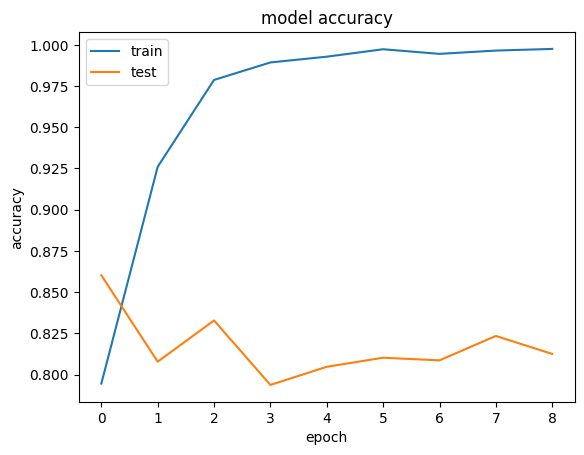

In [2]:
import matplotlib.pyplot as plt
accuracy = [0.7945, 0.9260, 0.9787, 0.9893, 0.9928, 0.9973, 0.9945, 0.9965, 0.9975]
val_accuracy = [0.8602, 0.8078, 0.8328, 0.7937, 0.8047, 0.8102, 0.8086, 0.8234, 0.8125]
plt.plot(accuracy, label='train')
plt.plot(val_accuracy, label='test')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('model accuracy')
plt.legend()
plt.show()

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

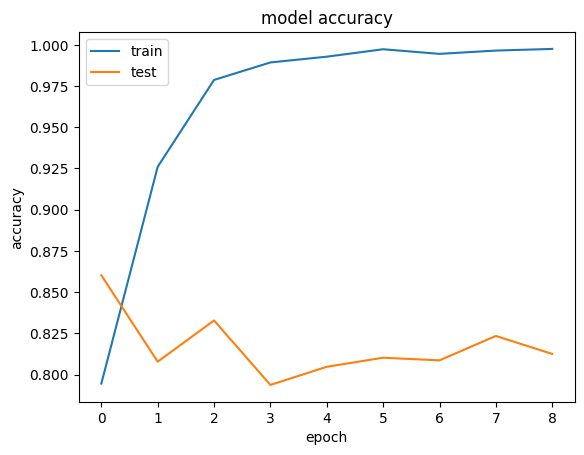

In [3]:
plt.plot(accuracy, label='train')
plt.plot(val_accuracy, label='test')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('model accuracy')
plt.legend()
plt.show()

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('model loss')
plt.legend()
plt.show()

In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluate the model on the test set
y_pred = model.predict(x_test)
y_pred = y_pred[:,0]
y_pred_class = np.where(y_pred >= 0.5, 1, 0)
acc = accuracy_score(y_test, y_pred_class)
precision = precision_score(y_test, y_pred_class)
recall = recall_score(y_test, y_pred_class)
f1 = f1_score(y_test, y_pred_class)

print('Test accuracy:', acc)
print('Test precision:', precision)
print('Test recall:', recall)
print('Test F1-score:', f1)

40/40 [==============================] - 5s 116ms/step
Test accuracy: 0.86015625
Test precision: 0.8845577211394303
Test recall: 0.8526011560693642
Test F1-score: 0.8682855040470935
